## This jupyter notebook contains an analysis on the public blog post. There are about 1.8 million total posts in this data set. All of these data are publicly available on the web. The data has the following format:

{
    “blog_id”: id identifying the blog
    
    “post_id”: id identifying the post on that blog
    
    “lang”: the language code for the post (this is a combination of the user setting and our  language detection algorithm
    
    “url”: url to the post (but without ‘http(s)://’)
    
    “date_gmt”: date and time that the post was published
    (as set by the user). example: “2010-01-30 14:48:55"
    
    “title”: text title of the post
    
    “content”: text of the post with all html stripped out
    
    “author”: authors displayed name
    
    “author_login”: authors login username
    
    “author_id”: user id of the author
    
    “liker_ids”: array of user ids for people who have liked this post
    
    “like_count”: number of likes for this post
    
    “commenter_ids”: array of user ids for people who have commented on this post
    
    “comment_count”: number of comments on this post
}

## Tableau visualization link: 
https://public.tableau.com/app/profile/himani.gadve/viz/Automattic_userengagmentanalysis/Summary


In [1]:
# importing all the required packages
import os
import json
import gzip

from urllib.request import urlopen

# dataframe and series 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
from datetime import *

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib

import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#%%
#Setting Warnings Settings 
warnings.filterwarnings(action='once') 
pd.set_option('display.float_format', lambda x: '%.3f' % x) #display changed from scientific to numeric format
pd.set_option('expand_frame_repr', False)

## JSON to CSV Conversion 

In [3]:
# getting data from json.gz file
#%%
df_data = []
with gzip.open('posts.jsonl.gz') as data:
    for i in data:
        df_data.append(json.loads(i.strip()))

In [4]:
#%%
# to see the length of the data, it means total number of likes and comments also
print(len(df_data))

# to see the first row of the list
print(df_data[0])

1809199
{'comment_count': 0, 'content': "The Snap! Jamaal Jackson tore knee ligaments in their win over the Denver Broncos. Making his first NFL start at center will be Nick Cole. Cole filled in at center against the Broncos, but McNabb fumbled two snaps, and three offensive linemen were penalized for false starts. While you can&#39;t blame all the false starts on the new center, it certainly doesn&#39;t make things easier for the linemen. \xa0 The good news is that Brian Westbrook is back after missing 5 games. His performance last week against the Broncos was promising, he had 9 carries for a total of 32 yards. In his last game against Dallas, Westbrook carried the ball 13 times for 50 yards rushing. \xa0 Does it matter that Michael Vick may not be available to play? Probably not, but we&#39;d certainly like to see him out on the field for a few key plays.\xa0If McNabb gets hurt, Kevin Kolb\xa0who proved himself against the Chiefs\xa0can help the Eagles soar to victory. \xa0 Bring ou

In [5]:
#%%
df = pd.DataFrame.from_dict(df_data) # convert dictionary to dataframe

In [6]:
#%%
df.to_csv('blog_post.csv', index = False) # to use easily everytime, I write it to csv

In [7]:
#%%
pd.options.display.max_columns=100 # To see the hidden columns in dataframe

# Exploratory Data Analysis
Let’s have a look at data dimensionality, feature names, and feature types.

In [ ]:
#%%
df = pd.read_csv('blog_post.csv', parse_dates=['date_gmt'], low_memory=False) #getting main data
df.head()

In [9]:
#%%
# From the output, we can see that the table contains 1973758 rows and 14 columns.
df.shape

(1973758, 14)

In [10]:
#%%
df.isna().sum()

comment_count          0
content           187830
author            164869
title             189261
like_count        164559
author_login      164869
blog_id           164559
date_gmt          164559
author_id         164559
post_id           164559
lang              164559
url               164560
liker_ids        1117545
commenter_ids    1402422
dtype: int64

### Checking for missing values in key dimensions: 'blog_id','author_id','post_id'

In [11]:
#%%
# making new data frame with dropped NA values
df1 = df.dropna(axis = 0, subset = ['blog_id','author_id','post_id'], how = 'all')
  
# comparing sizes of data frames
print("Old data frame length:", len(df), "\nNew data frame length:", 
       len(df1), "\nNumber of rows with at least 1 NA value: ",
       (len(df)-len(df1)))

Old data frame length: 1973758 
New data frame length: 1809199 
Number of rows with at least 1 NA value:  164559


In [12]:
#%%
# droppping all the records with null values for 'blog_id','author_id','post_id'
df.dropna(axis = 0, subset = ['blog_id','author_id','post_id'], how = 'all',inplace = True)

In [13]:
#%%
# converting date from string to datetime and dropping dates which are not in the correct formate
df['date_gmt'] = pd.to_datetime(df['date_gmt'].str[:10],  infer_datetime_format=True, errors = 'coerce')
# drop null dates from analysis
df.dropna(axis = 0, subset = ['date_gmt'], how = 'all',inplace = True)
print(df['date_gmt'].isnull().sum())

0


In [14]:
#%%
# pd.to_datetime(df['date_gmt'].str[:10],  infer_datetime_format=True)
# df['date_gmt'] = pd.to_datetime(df['date_gmt'],format='%d/%m/%Y', errors = 'coerce')
df['comment_count'] = pd.to_numeric(df['comment_count'], errors='coerce')
df["comment_count"] = pd.to_numeric(df["comment_count"], downcast="float")

### After converting a missing value, data looks good for key dimesions

In [15]:
#%%
df.isnull().sum()

comment_count          0
content            56756
author               310
title              24702
like_count             0
author_login         310
blog_id                0
date_gmt               0
author_id              0
post_id                0
lang                   0
url                    0
liker_ids         952984
commenter_ids    1237860
dtype: int64

In [16]:
#%%
df.describe()

,comment_count,like_count,blog_id
count,1809195.000,1809195.000,1809195.000
mean,3.451,4.239,40167362.364
std,70.883,10.795,24670201.947
min,0.000,0.000,753.000
25%,0.000,0.000,17073975.000
50%,0.000,0.000,39400514.000
75%,3.000,4.000,62264365.000
max,90182.000,1063.000,90938473.000


## What are the median and the mean numbers of likes per post in this data sample?

In [17]:
#%%
df_meadian=df.groupby(['post_id']).agg({'like_count':np.median}).reset_index()
df_meadian

,post_id,like_count
0,1,0.000
1,2,0.000
2,3,0.000
3,4,0.000
4,5,0.000
...,...,...
137689,9991,0.000
137690,9993,2.000
137691,9995,0.000
137692,9997,0.500


In [18]:
#%%
df_mean=df.groupby(['post_id']).agg({'like_count':np.mean}).reset_index()
df_mean

,post_id,like_count
0,1,4.525
1,2,6.423
2,3,1.524
3,4,1.259
4,5,1.253
...,...,...
137689,9991,0.000
137690,9993,2.000
137691,9995,0.000
137692,9997,0.500


### Findings:

By comparing the mean and median of likes count per post for the first 5 post, median value looks to be zero and mean value looks like 1 to 6 likes per post in first five post.

## Visualize the total daily count of likes vs total daily comments for this data sample

To better understand the Daily count of likes vs comments, we need to first understand the timeseries data for all the years which can be possible by dividing analysis in 3 phases;
- Yearly Trends
- Monthly Trends
- Daily Trends based on the cohort filtering

In [19]:
#%%
# converting object to datetime
df['date_gmt'] =  pd.to_datetime(df['date_gmt'],  infer_datetime_format=True)

In [20]:
#%%
# total daily count of likes vs total daily comments 
df1 = df.groupby(df.date_gmt.dt.date).agg({'like_count':'sum','comment_count':'sum'}).reset_index()
df1.sort_values('date_gmt',ascending = False).head(10)

,date_gmt,like_count,comment_count
4618,2015-05-28,622.000,192.000
4617,2015-05-27,8111.000,2654.000
4616,2015-05-26,9387.000,3887.000
4615,2015-05-25,10169.000,4152.000
4614,2015-05-24,9402.000,3719.000
4613,2015-05-23,7774.000,3108.000
4612,2015-05-22,11431.000,5227.000
4611,2015-05-21,10580.000,5044.000
4610,2015-05-20,11834.000,6109.000
4609,2015-05-19,10652.000,5945.000


## Yearly trend Analysis

In [21]:
#%%
df['Year_gmt'] = pd.to_datetime(df['date_gmt']).apply(lambda x: '{year}'.format(year=x.year))
yearlydf = df.groupby('Year_gmt').agg({'like_count':'sum','comment_count':'sum'}).reset_index().sort_values('Year_gmt',ascending= True)
yearlydf['pct_like'] = yearlydf['like_count'].pct_change() * 100
yearlydf['pct_comment'] = yearlydf['comment_count'].pct_change() * 100
yearlydf.sort_values('Year_gmt',ascending= False)



,Year_gmt,like_count,comment_count,pct_like,pct_comment
31,2015,1969259.000,989573.000,-39.434,-48.883
30,2014,3251433.000,1935887.000,98.773,53.193
29,2013,1635754.000,1263692.000,130.120,26.939
28,2012,710826.000,995513.000,763.638,66.187
27,2011,82306.000,599031.000,611.990,178.221
26,2010,11560.000,215308.000,222.185,117.220
25,2009,3588.000,99120.000,20.201,58.465
24,2008,2985.000,62550.000,311.724,83.211
23,2007,725.000,34141.000,223.661,2.231
22,2006,224.000,33396.000,1020.000,270.819


**Findings:**

The yearly trend shows that likes count started growing from 2005 and increased drastically over the year with increase in 984k % change compare to 2005. Furthermore, for Comments started growing from 2002 and increased exponentially over the years.

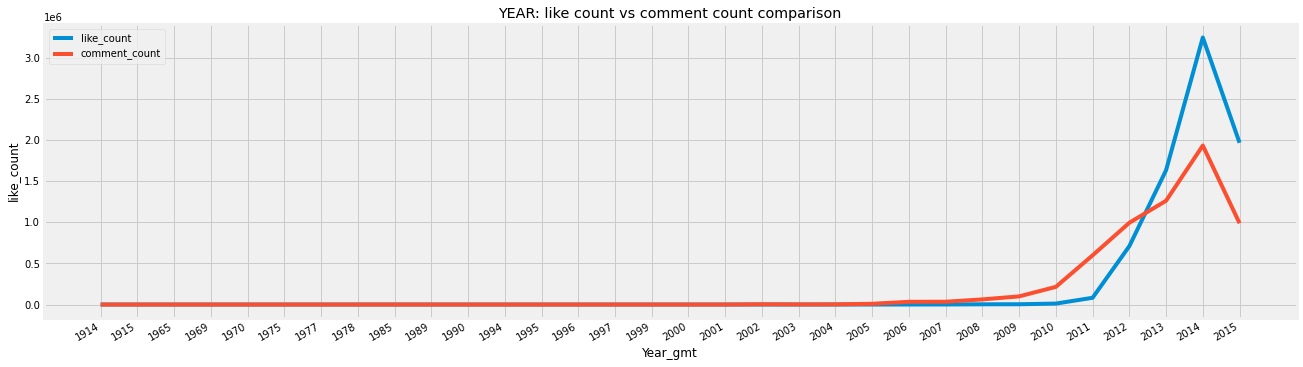

In [22]:
#%%

#plotting totals 
plt.figure(figsize=(20,6))
ax1 = plt.subplot(111)
sns.lineplot(data=yearlydf, x='Year_gmt', y='like_count', palette = 'blue', label ='like_count')
# total comments
sns.lineplot(data=yearlydf, x='Year_gmt', y='comment_count', palette = 'orange',label = 'comment_count')
plt.xticks(rotation = 75, horizontalalignment='center', fontweight='light', fontsize=10)
plt.title("YEAR: like count vs comment count comparison")
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()
plt.show()

### Filtered data before 2002 as comments started growing from year 2002

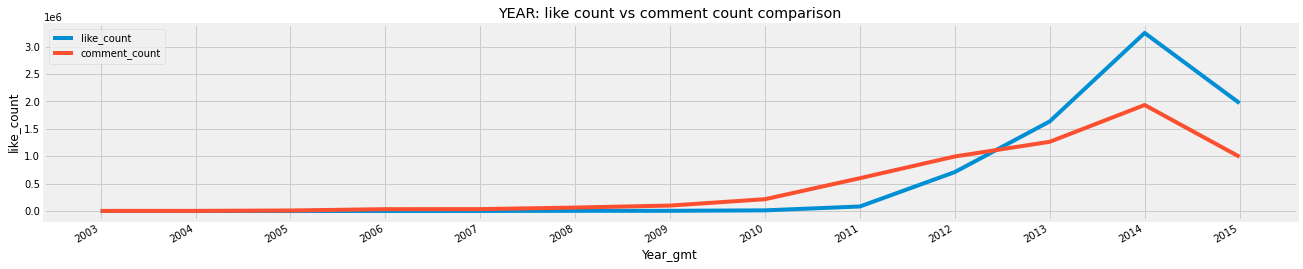

In [23]:
#%%
# Filtered data below year 2002
yearlydf1 = yearlydf[yearlydf['Year_gmt'] > '2002'].copy()

#plotting totals 
plt.figure(figsize=(20,4))
ax1 = plt.subplot(111)
sns.lineplot(data=yearlydf1, x='Year_gmt', y='like_count', palette = 'blue', label ='like_count')
# total comments
sns.lineplot(data=yearlydf1, x='Year_gmt', y='comment_count', palette = 'orange',label = 'comment_count')
plt.xticks(rotation = 75, horizontalalignment='center', fontweight='light', fontsize=10)
plt.title("YEAR: like count vs comment count comparison")
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()
plt.show()

<AxesSubplot:xlabel='Year_gmt', ylabel='comment_count'>

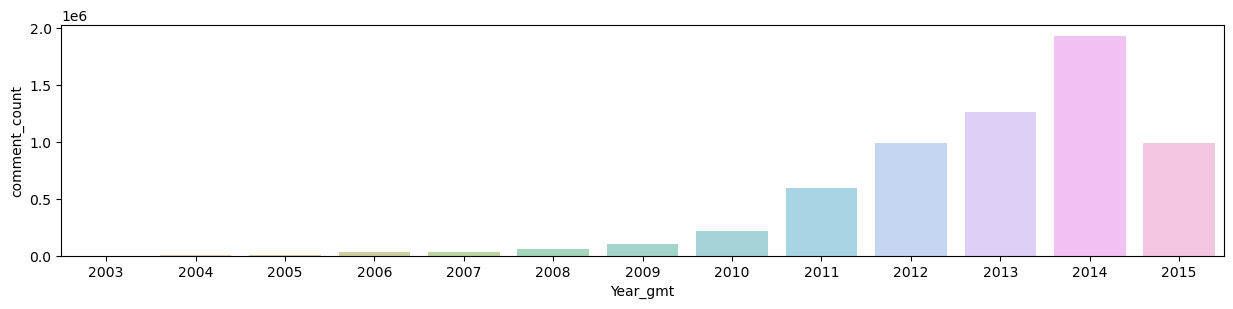

In [24]:
#%%
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(15,3))
sns.barplot(data = yearlydf1, x='Year_gmt', y='comment_count', alpha=0.5)

<AxesSubplot:xlabel='Year_gmt', ylabel='like_count'>

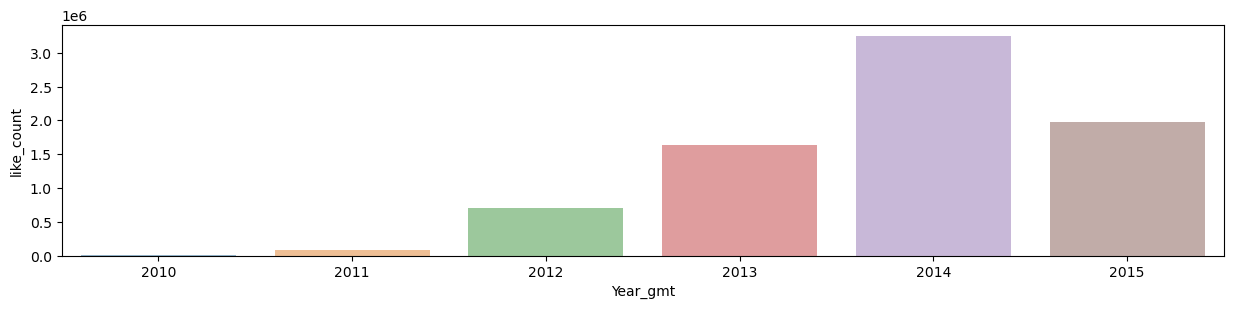

In [25]:
#%%
yearlydf2 = yearlydf[yearlydf['Year_gmt'] > '2009'].copy()

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(15,3))
sns.barplot(data = yearlydf2, x='Year_gmt', y='like_count', alpha=0.5)

###  Findings: 
It is evident that like counts are maximum for the year 2013, 2014, 2015

## Daily trend Analysis

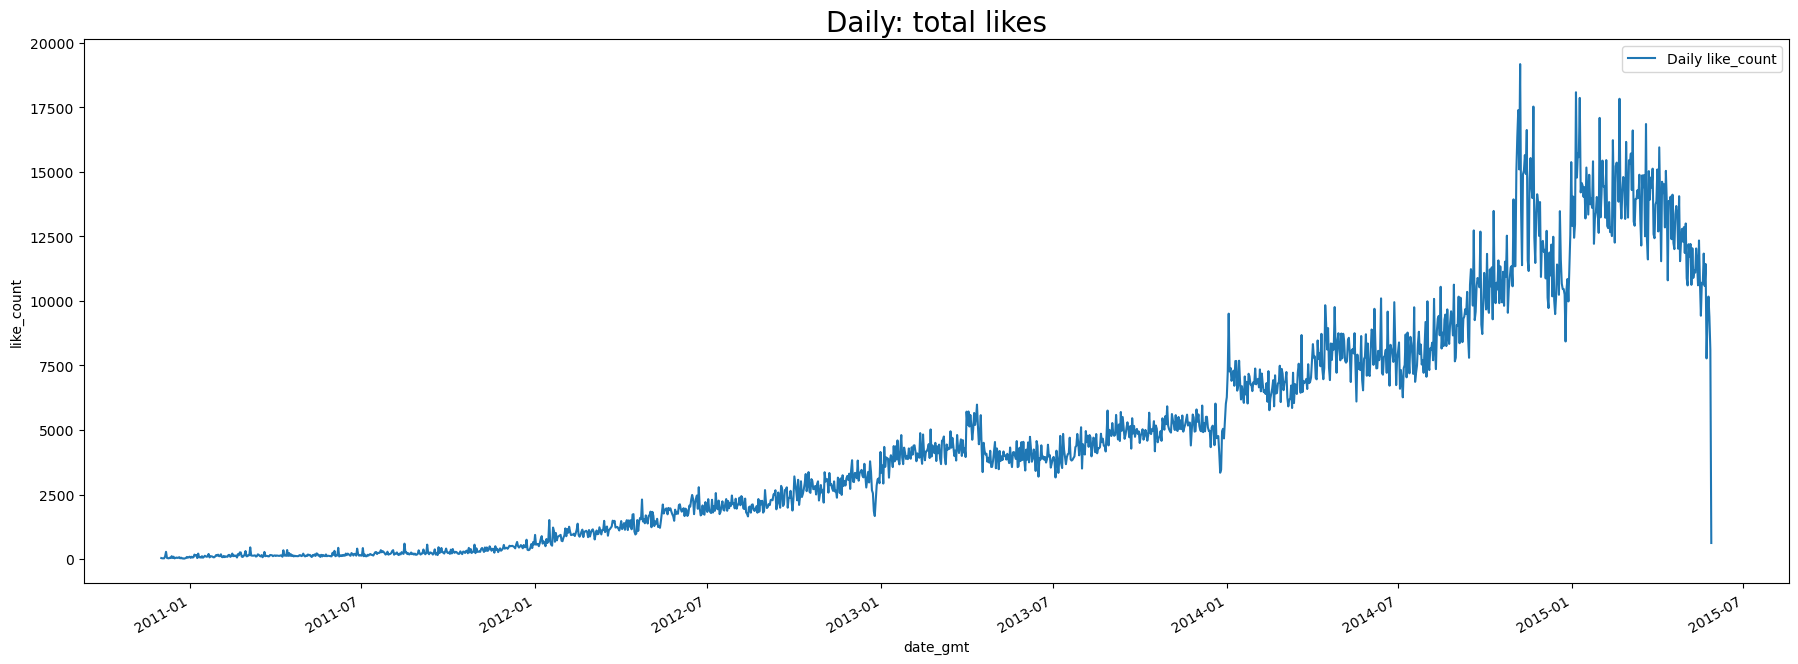

In [26]:
#%%
import datetime
dfm = df[df.date_gmt.dt.date > datetime.date(2010,12,1)].copy()
df2 = dfm.groupby(dfm.date_gmt.dt.date).agg({'like_count':'sum','comment_count':'sum'}).reset_index()
#plotting totals 
plt.figure(figsize=(22,8))
ax1 = plt.subplot(111)
sns.lineplot(data=df2, x='date_gmt', y='like_count', palette = 'blue', label ='Daily like_count')
plt.xticks(rotation = 75, horizontalalignment='center', fontweight='light', fontsize=10)
plt.title("Daily: total likes", fontsize=20)
plt.legend(loc='upper right')
plt.gcf().autofmt_xdate()
plt.show()

### Findings:
It looks like a sudden spike in the daily like counts in the end of 2014


In [27]:
#%%
df['YearMonth'] = pd.to_datetime(df['date_gmt']).apply(lambda x: '{year}-{month}'.format(year=x.year,month=x.month))
monthdf = df.groupby('YearMonth').agg({'like_count':'sum','comment_count':'sum'}).reset_index().sort_values('YearMonth',ascending= True)
monthdf['pct_like'] = monthdf['like_count'].pct_change() * 100
monthdf['pct_comment'] = monthdf['comment_count'].pct_change() * 100
monthdf.sort_values('YearMonth',ascending= False)

,YearMonth,like_count,comment_count,pct_like,pct_comment
209,2015-5,293663.000,137891.000,-26.094,-29.946
208,2015-4,397348.000,196836.000,-8.926,-6.151
207,2015-3,436292.000,209737.000,9.389,1.983
206,2015-2,398845.000,205659.000,-9.990,-14.112
205,2015-1,443111.000,239450.000,48.821,44.591
...,...,...,...,...,...
4,1969-8,0.000,0.000,-100.000,-100.000
3,1969-12,6.000,10.000,inf,inf
2,1965-1,0.000,0.000,-100.000,-100.000
1,1915-4,5.000,11.000,inf,inf


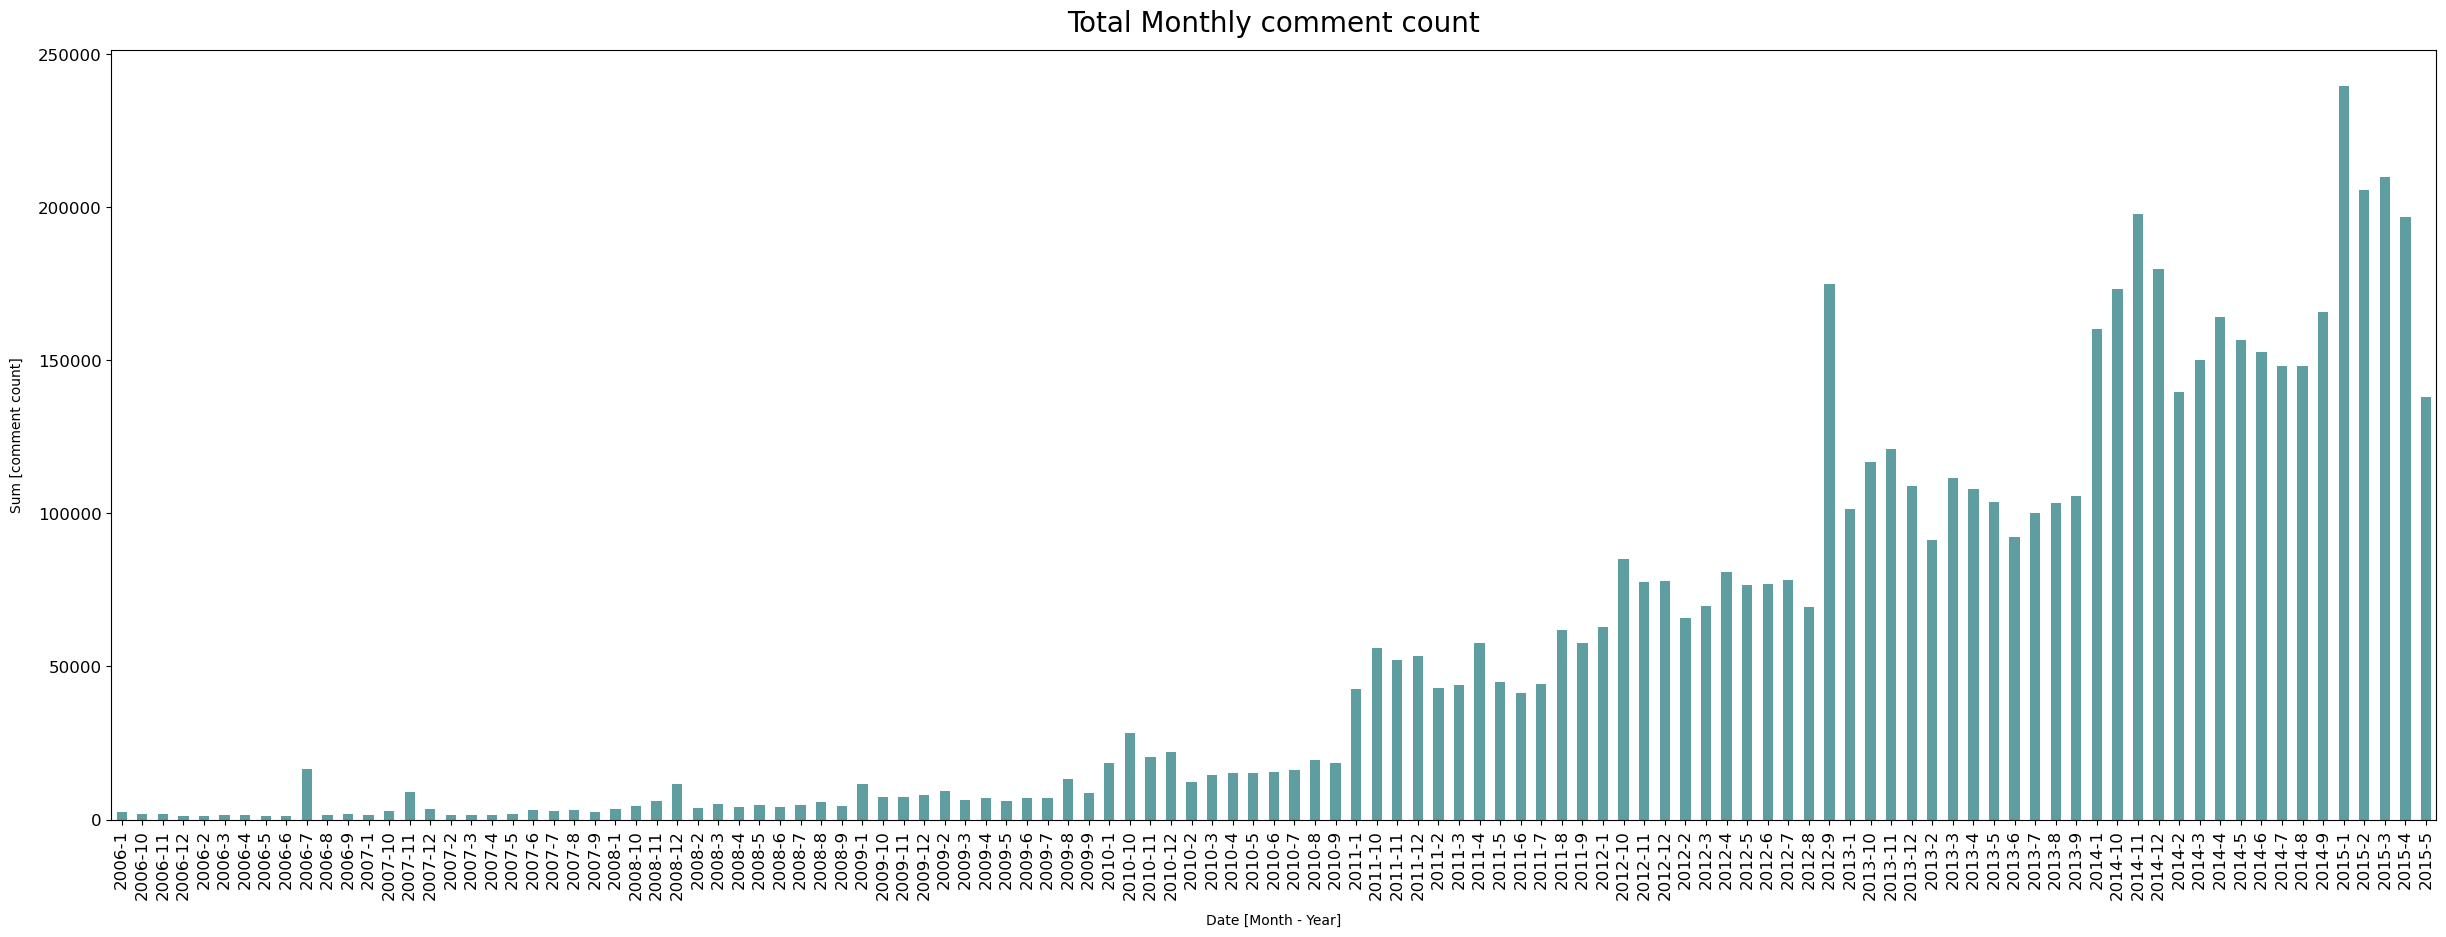

In [28]:
#%%
monthdf1 = monthdf[monthdf['YearMonth'] > '2006-01'].copy()
monthdf1.sort_values('YearMonth',inplace=True)
monthdf1.set_index('YearMonth')['comment_count'].plot(kind='bar',figsize=(30, 10),color='cadetblue',rot=90, fontsize=12)
plt.title("Total Monthly comment count", y=1.013, fontsize=20)
plt.ylabel("Sum [comment count]", labelpad=10)
plt.xlabel("Date [Month - Year]", labelpad=10);

### Findings:
It shows the spike in the comments counts for the last 3 months of the year end such as September, October, November, December

# Q3: How would you determine which authors are the most “popular”? What additional data would you need?

 First step to check if there are any null authors present in the analysis and understand the total cohort size

In [29]:
#%%
# check nulls in the authors count
print(f'Total Authors: {df["author_id"].count()}')
print(f'Null Authors: {df["author_id"].isnull().sum()}')

Total Authors: 1809195
Null Authors: 0


In order to understand the popularity of any author first steps need to do is that to aggregate data based on the below given key dimension:
- Count of Post_id - To understand how many post author has done
- Count of blog_id - To understand how many blogs author has publishes
- Sum of total comment count - Provides good measure of popularity as reader has shown interest in the authors post and commented on it
- Sum of total likes count - provides insights on liking or unliking of the posts

In [30]:
#%%
authdf =  df.groupby(["author_id","author"]).agg({"post_id":'count',"blog_id":'count',"comment_count":'sum',"like_count":'sum'}).reset_index()
authdf.sort_values(by = ['comment_count',"like_count",'post_id'],ascending=False).head(10)


,author_id,author,post_id,blog_id,comment_count,like_count
764,4695191,tonyedwards,162,162,132194.000,0.000
115,0,User 378045,1815,1815,118244.000,90.000
2918,23477253,Clarissa,8425,8425,106232.000,2595.000
251,0,User 8643518,13376,13376,71192.000,0.000
15990,19811010,Ron DuBour,7256,7256,63925.000,47511.000
16098,21544306,Asphodèle,1034,1034,58859.000,4551.000
4384,33424361,Terry,8335,8335,58177.000,90354.000
2277,17906500,Olfactoria,1312,1312,49434.000,7054.000
4215,31743217,Marilyn Armstrong,3387,3387,48023.000,87402.000
650,3594980,saddington,5817,5817,47534.000,495.000


### Top 10 authors based on the Number of posts 
- Found out that author **"Eli Nathanael"** has made 42760 posts which is 2.3% of total posts but did not receive much engagement from users after looking at the number of comments and likes 
- second highest post has been made by author **FLYNN** with post 42760 which accounts for 1.2% of total and received good support and engagement from users in terms of the number of comments and likes

In [31]:
#%%
# Top 10 authors based on the Number of posts
authdf["pct_total_post"] = (authdf["post_id"] / authdf["post_id"].sum()) * 100
authdf.sort_values(by = ['post_id'],ascending=False).head(10)

,author_id,author,post_id,blog_id,comment_count,like_count,pct_total_post
12378,70065670,Eli Nathanael,42760,42760,103.000,408.000,2.364
439,1158701,FLYNN,20169,20169,4072.000,5989.000,1.115
820,5397247,Bryan Tomlinson,16926,16926,305.000,13023.000,0.936
251,0,User 8643518,13376,13376,71192.000,0.000,0.739
270,27628,rjbailey,12089,12089,851.000,498.000,0.668
1424,11170378,nuvofelt,10012,10012,15329.000,42441.000,0.553
2918,23477253,Clarissa,8425,8425,106232.000,2595.000,0.466
4384,33424361,Terry,8335,8335,58177.000,90354.000,0.461
2241,17432410,Pat Cegan,8130,8130,31407.000,305270.000,0.449
15990,19811010,Ron DuBour,7256,7256,63925.000,47511.000,0.401


# Popularity based on the Engagement metrics:
To understand further the popularity of the author we need to look at 2 key metrics which are total comments made on the post which shows engagement from users and other important metric is total likes received which shows the 

**Likes**: Liking a post is easy. Liking takes only one click. when someone likes your post, you don’t have the opportunity to engage back.

**Comments**: This allows a user to type a response to the post.

As with likes, the more comments a post receives, the more people will see the post. However, comments have more weight than likes in social media algorithms, so **five comments are worth more than five likes**. Comments are great because they give the opportunity for you to continue the conversation. When a user comments, you can like their comment and reply to it. When you comment on other pages, you stand out from the crowded likes list and many pages will reply to you.

**Derived Metric:**
- Total Comments received
- **Average comments per post**: This shows the average number of comments done on a post 

In [32]:
#%%
authdf["Avg_comments_per_post"] = authdf["comment_count"] / authdf["post_id"]
authdf.sort_values(by = ['Avg_comments_per_post'],ascending=False).head(10)

,author_id,author,post_id,blog_id,comment_count,like_count,pct_total_post,Avg_comments_per_post
764,4695191,tonyedwards,162,162,132194.000,0.000,0.009,816.012
382,791271,Gail Tverberg,238,238,47125.000,696.000,0.013,198.004
2058,15699701,Ruud (the Bugman) Kleinpaste,2,2,381.000,0.000,0.000,190.500
2492,19236204,Reverse Engineer,4,4,700.000,4.000,0.000,175.000
221,0,User 69388801,9,9,1349.000,0.000,0.000,149.889
2529,19497751,Le Clown,1,1,128.000,92.000,0.000,128.000
16016,20079602,wilmary15,8,8,1008.000,10.000,0.000,126.000
1129,8756488,Doobster418,1,1,120.000,22.000,0.000,120.000
4559,34694471,stuartmcphersonpoet,8,8,919.000,226.000,0.000,114.875
3169,25092346,tashtoo,18,18,2062.000,451.000,0.001,114.556


**Findings**

After looking at total data for total comment per post found out that author **tonyedwards** have made 162 posts in his total duration on the app and **received 132k comments** which means **received highest ~816 comments per post** but did not recieve any likes which is interesting. There can be multiple reasons and to understand better we need to check yearly comments data to see if likes feature was available at that time

<AxesSubplot:xlabel='Avg_comments_per_post', ylabel='author'>

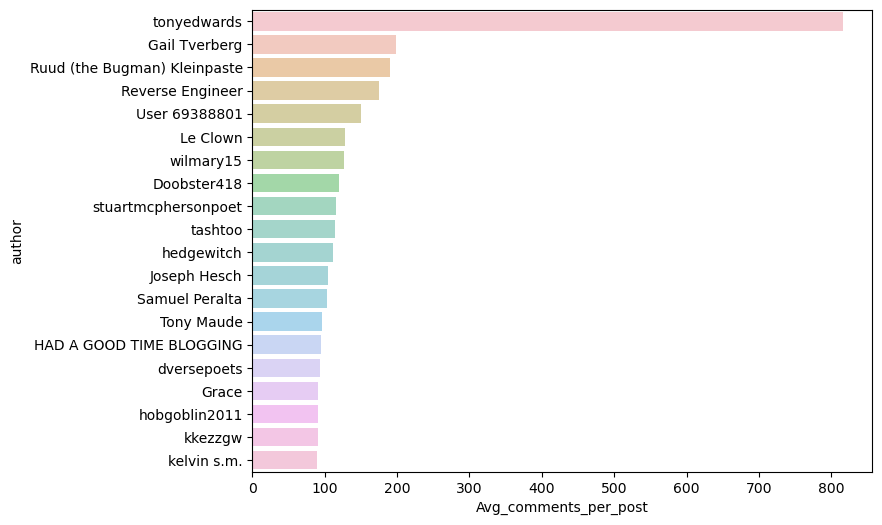

In [33]:
#%%
commentdf = authdf.sort_values(by = ['Avg_comments_per_post'],ascending=False).head(20)

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(8,6))
sns.barplot(data = commentdf, x='Avg_comments_per_post', y='author', alpha=0.5)

### Popularity based on Likes

**Derived Metric:**
- Total likes received
- **Total likes per post**: This shows the average number of likes recieved on a post 

In [34]:
#%%
authdf["avg_likes_per_post"] = authdf["like_count"] / authdf["post_id"]
authdf.sort_values(by = ['avg_likes_per_post'],ascending=False).head(10)

,author_id,author,post_id,blog_id,comment_count,like_count,pct_total_post,Avg_comments_per_post,avg_likes_per_post
3008,23977842,Nicole Marie,1,1,78.000,241.000,0.000,78.000,241.000
6473,46933964,Charly Senall,4,4,85.000,565.000,0.000,21.250,141.250
6763,49256179,Elina,47,47,1098.000,6411.000,0.003,23.362,136.404
4705,35748149,Susan,35,35,604.000,4645.000,0.002,17.257,132.714
1882,14334677,syl65,1,1,19.000,131.000,0.000,19.000,131.000
14015,75417886,billythetimecat,4,4,128.000,487.000,0.000,32.000,121.750
13162,72304849,lawjic,1,1,13.000,120.000,0.000,13.000,120.000
2282,17947029,Patti Kuche,44,44,912.000,5097.000,0.002,20.727,115.841
13411,73268623,samobiker,11,11,153.000,1264.000,0.001,13.909,114.909
6477,46992125,Mike Pratt,35,35,592.000,4013.000,0.002,16.914,114.657


**Findings**

After looking at total data for Average likes per post found out that author **Nicole Marie** has made only 1 post in his total duration on the app and received 241 likes which means **received highest ~241 likes per post** and also recieved 78 comments shows that high engagement from users on that one post.

<AxesSubplot:xlabel='avg_likes_per_post', ylabel='author'>

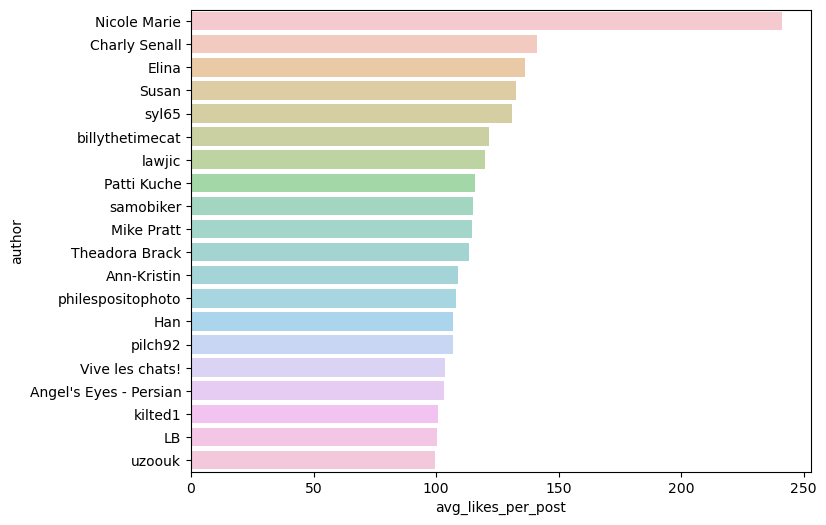

In [35]:
#%%
likesdf = authdf.sort_values(by = ['avg_likes_per_post'],ascending=False).head(20)

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(8,6))
sns.barplot(data = likesdf, x='avg_likes_per_post', y='author', alpha=0.5)

## Popularity based on Yearly trend

In [36]:
#%%
authdf1 =  df.groupby(["author_id",'author','Year_gmt']).agg({"post_id":'count',"blog_id":'count',"comment_count":'sum',"like_count":'sum'}).reset_index()
# Creating metrics to better understand engagement 
authdf1["avg_likes_per_post"] = authdf1["like_count"] / authdf1["post_id"]
authdf1["Avg_comments_per_post"] = authdf1["comment_count"] / authdf1["post_id"]
authdf1.sort_values(by = ['comment_count',"like_count"],ascending=False).head(5)


,author_id,author,Year_gmt,post_id,blog_id,comment_count,like_count,avg_likes_per_post,Avg_comments_per_post
3121,4695191,tonyedwards,2012,43,43,132194.000,0.000,0.000,3074.279
36724,19811010,Ron DuBour,2011,420,420,59897.000,394.000,0.938,142.612
713,0,User 8643518,2011,2075,2075,41144.000,0.000,0.000,19.828
342,0,User 378045,2012,600,600,40118.000,12.000,0.020,66.863
36778,19998747,Jonathan Caswell,2011,478,478,35144.000,869.000,1.818,73.523


In [37]:
#%%
authdf1 = authdf1[authdf1['Year_gmt'] > '2002'].copy()
authdf2 = authdf1.sort_values(['Year_gmt','comment_count'], ascending=False).groupby('Year_gmt').head(1).copy()
authdf2

,author_id,author,Year_gmt,post_id,blog_id,comment_count,like_count,avg_likes_per_post,Avg_comments_per_post
14072,31656018,Gibber,2015,109,109,12377.000,1361.000,12.486,113.550
1486,791271,Gail Tverberg,2014,32,32,23380.000,241.000,7.531,730.625
18529,43271892,Kylie McConville,2013,740,740,29326.000,1838.000,2.484,39.630
3121,4695191,tonyedwards,2012,43,43,132194.000,0.000,0.000,3074.279
36724,19811010,Ron DuBour,2011,420,420,59897.000,394.000,0.938,142.612
3899,6863054,Therese Trouserzoff,2010,222,222,13626.000,8.000,0.036,61.378
339,0,User 378045,2009,72,72,8999.000,18.000,0.250,124.986
338,0,User 378045,2008,81,81,7215.000,16.000,0.198,89.074
300,0,User 3594980,2007,21,21,6499.000,0.000,0.000,309.476
299,0,User 3594980,2006,13,13,15837.000,0.000,0.000,1218.231


<AxesSubplot:xlabel='comment_count', ylabel='author'>

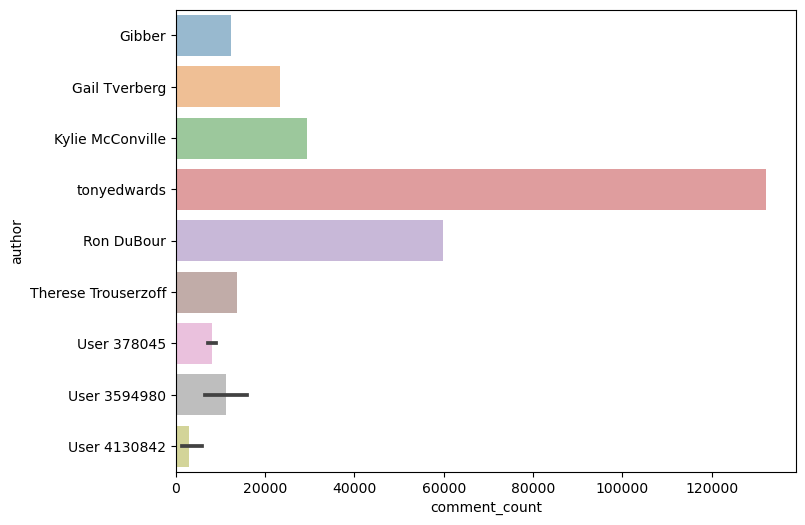

In [38]:
#%%
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(8,6))
sns.barplot(data = authdf2, x='comment_count', y='author', alpha=0.5)

### Findings

After looking at total data for Average comments count per post found out that author Tonyedwards has more than 120000 comments counts in his total duration on the app. Seconds highest comments counts receiver is Ron DuBour who received around 60000 comments counts which can be interpreted as high engagement from these two authors.

# What additional data would you need?¶

- The key missing feature in this data is the **actual comments given by users**. it would have helped use to perform **sentimental analysis** to understand the emotions and liking for each post. 

**User acquisition Funnel analysis**
- **First post/Blog date or Author signup date**: signup or first post date would have helped us to create retention analyis to understand the health of the user acquision funnel
- Missing details about users and their signup to first comment/like dates or flag

**Demographic data**
- Missing demographic data like age, gender, education would have helped use to better segment data into multiple funnels
- Author type: eg, poet, Novelist, writer, Lyricist, screen writer, play write
- Post/Blog type: eg.music, sport, reviews, news, updates


# What is a unique insight you can provide us about the data?

### Key Metrics yearly trend analysis:
- Total Active authors per year
- Total Posts per year
- Total Comments received
- Average comments per post per year: This shows the average number of comments done on a post 
- Total Likes received
- Average likes per post per year : This shows the average number of comments done on a post 

In [39]:
#%%
insdf =  df.groupby(['Year_gmt']).agg({'author_id':'count','blog_id':'count','post_id':'count','comment_count':'sum','like_count':'sum'}).reset_index()

# Creating metrics to better understand engagement
insdf["avg_likes_per_post"] = (insdf["like_count"] / insdf["post_id"]) * 100
insdf["Avg_comments_per_post"] = (insdf["comment_count"] / insdf["post_id"]) * 100
insdf["Avg_comments_per_author"] = (insdf["comment_count"] / insdf["author_id"]) * 100
insdf.sort_values(by = ['Year_gmt'],ascending=False).head(15)


,Year_gmt,author_id,blog_id,post_id,comment_count,like_count,avg_likes_per_post,Avg_comments_per_post,Avg_comments_per_author
31,2015,344670,344670,344670,989573.000,1969259.000,571.346,287.107,287.107
30,2014,619470,619470,619470,1935887.000,3251433.000,524.873,312.507,312.507
29,2013,337899,337899,337899,1263692.000,1635754.000,484.096,373.985,373.985
28,2012,214773,214773,214773,995513.000,710826.000,330.966,463.519,463.519
27,2011,128292,128292,128292,599031.000,82306.000,64.155,466.928,466.928
26,2010,69125,69125,69125,215308.000,11560.000,16.723,311.476,311.476
25,2009,40110,40110,40110,99120.000,3588.000,8.945,247.120,247.120
24,2008,25507,25507,25507,62550.000,2985.000,11.703,245.227,245.227
23,2007,13790,13790,13790,34141.000,725.000,5.257,247.578,247.578
22,2006,9041,9041,9041,33396.000,224.000,2.478,369.384,369.384


**Insights:**
    
- **Yearly Active Authors + New user Analysis**: The data shows that active Author counts doubled every year with growth rate of ~200% starting from 2007 and reached till ~450% in year 2011 and 2012 and reached to highest in 2014 which was 619470
- **User Engagement**: Key metrics to measure engagement is number comments and likes on the post and allows users to interact with Authors which keeps platform alive. So, decided to measure engagement using to 2 key metrics as follows:
- avg comments per post in a year & avg like per post in a year:
It shows that starting from 2010 comments per post count increased drastically with avg. count of ~300 comments per posts 


Text(0.5, 0, 'Date [Year]')

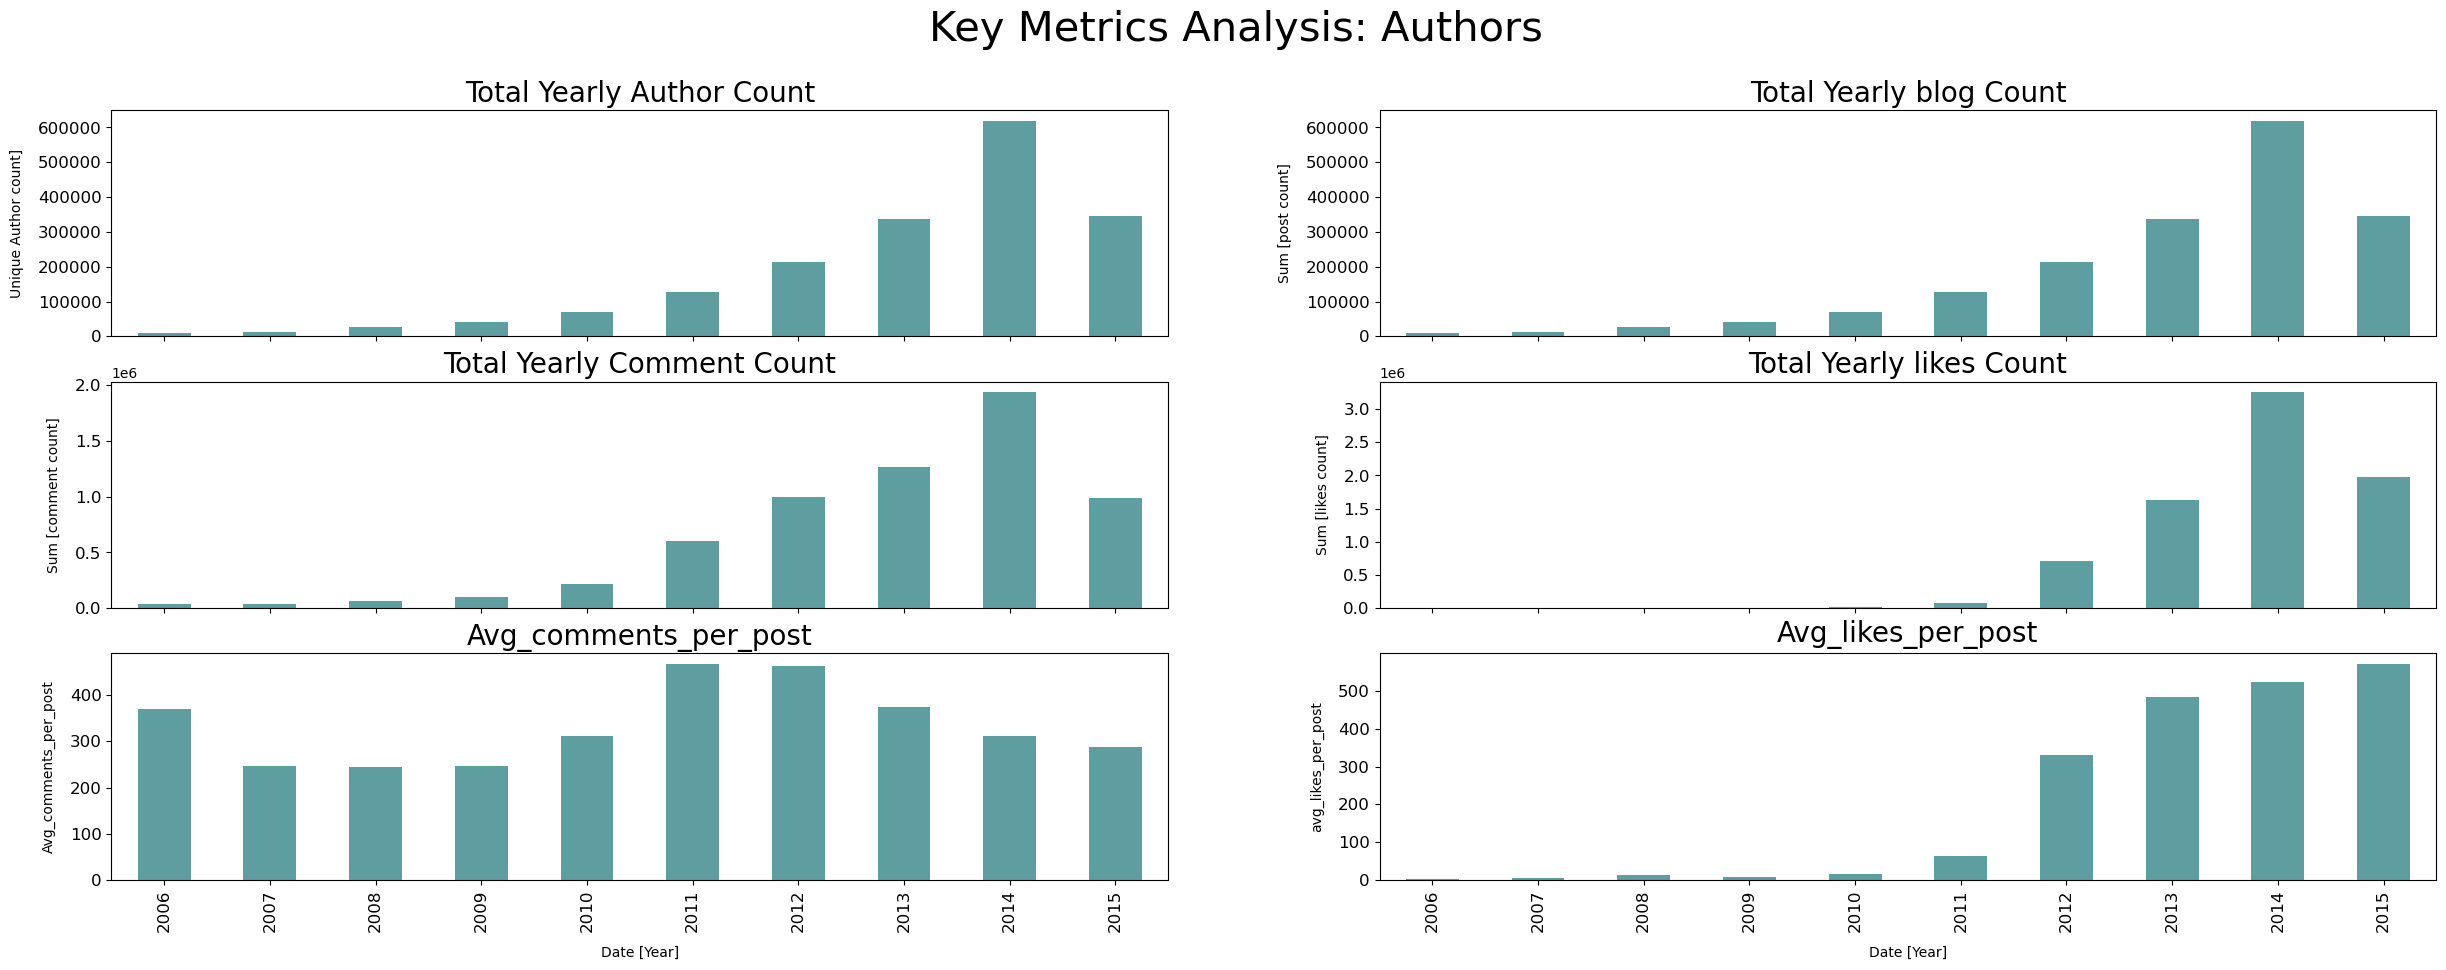

In [40]:
#%%
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(15,60))
fig.suptitle(f"Key Metrics Analysis: Authors",fontsize=30)
insdf1 = insdf[insdf['Year_gmt'] > '2005-01'].copy()
insdf1.sort_values('Year_gmt',inplace=True)
# Author count
insdf1.set_index('Year_gmt')['author_id'].plot(ax=axes[0, 0],kind='bar',figsize=(30, 10),color='cadetblue',rot=90, fontsize=12)
axes[0,0].set_title(f"Total Yearly Author Count",fontsize=20)
plt.title("", y=1.013, fontsize=20)
axes[0,0].set_ylabel("Unique Author count]", labelpad=10)
axes[0,0].set_xlabel("Date [Year]", labelpad=10)

# post Count
insdf1.set_index('Year_gmt')['post_id'].plot(ax=axes[0, 1],kind='bar',figsize=(30, 10),color='cadetblue',rot=90, fontsize=12)
axes[0,1].set_title(f"Total Yearly blog Count",fontsize=20)
plt.title("", y=1.013, fontsize=20)
axes[0,1].set_ylabel("Sum [post count]", labelpad=10)
axes[0,1].set_xlabel("Date [Year]", labelpad=10)

# Total Yearly Comment Count
insdf1.set_index('Year_gmt')['comment_count'].plot(ax=axes[1, 0],kind='bar',figsize=(30, 10),color='cadetblue',rot=90, fontsize=12)
axes[1,0].set_title(f"Total Yearly Comment Count",fontsize=20)
plt.title("", y=1.013, fontsize=20)
axes[1,0].set_ylabel("Sum [comment count]", labelpad=10)
axes[1,0].set_xlabel("Date [Year]", labelpad=10)

# Total Yearly like Count
insdf1.set_index('Year_gmt')['like_count'].plot(ax=axes[1, 1],kind='bar',figsize=(30, 10),color='cadetblue',rot=90, fontsize=12)
axes[1,1].set_title(f"Total Yearly likes Count",fontsize=20)
plt.title("", y=1.013, fontsize=20)
axes[1,1].set_ylabel("Sum [likes count]", labelpad=10)
axes[1,1].set_xlabel("Date [Year]", labelpad=10)

# Avg_comments_per_post
insdf1.set_index('Year_gmt')['Avg_comments_per_post'].plot(ax=axes[2, 0],kind='bar',figsize=(30, 10),color='cadetblue',rot=90, fontsize=12)
axes[2,0].set_title(f"Avg_comments_per_post",fontsize=20)
plt.title("", y=1.013, fontsize=20)
axes[2,0].set_ylabel("Avg_comments_per_post", labelpad=10)
axes[2,0].set_xlabel("Date [Year]", labelpad=10)

# avg_likes_per_post
insdf1.set_index('Year_gmt')['avg_likes_per_post'].plot(ax=axes[2, 1],kind='bar',figsize=(30, 10),color='cadetblue',rot=90, fontsize=12)
axes[2,1].set_title(f"Avg_likes_per_post",fontsize=20)
plt.title("Avg_likes_per_post", y=1.013, fontsize=20)
axes[2,1].set_ylabel("avg_likes_per_post", labelpad=10)
axes[2,1].set_xlabel("Date [Year]", labelpad=10)



### Findings:

1. Total yearly author count: Total yearly author count is highest in the year 2014
2. Total yearly blog count: Total yearly blog count is highest in the year 2014
3. Total yearly comment count: Total yearly comment count is highest in the year 2014
4. Total yearly likes count: Total yearly author count is highest in the year 2014 
    and there were no likes on the post prior to 2011
5. Average comment per post: Average comment per post has been significantly high since 2006. 
    With highest comment counts in year 2011 and 2012
6. Average likes per post: Average likes per post has been huge since 2013 to 2015. 
    Likes has become stifer on the post since 2010 


In [41]:
#%%
# Creating metrics to better understand engagement 
authdf1["avg_likes_per_post"] = authdf1["like_count"] / authdf1["post_id"]
authdf1["Avg_comments_per_post"] = authdf1["comment_count"] / authdf1["post_id"]
authdf1.sort_values(by = ['comment_count',"like_count"],ascending=False).head(5)


,author_id,author,Year_gmt,post_id,blog_id,comment_count,like_count,avg_likes_per_post,Avg_comments_per_post
3121,4695191,tonyedwards,2012,43,43,132194.000,0.000,0.000,3074.279
36724,19811010,Ron DuBour,2011,420,420,59897.000,394.000,0.938,142.612
713,0,User 8643518,2011,2075,2075,41144.000,0.000,0.000,19.828
342,0,User 378045,2012,600,600,40118.000,12.000,0.020,66.863
36778,19998747,Jonathan Caswell,2011,478,478,35144.000,869.000,1.818,73.523


## Total Blogs by Author analysis

In [42]:
#%%
blogdf = df.groupby(["author_id",'author']).agg({"blog_id":"count"}).reset_index().sort_values("blog_id",ascending=False).head(20)

blogdf

,author_id,author,blog_id
12378,70065670,Eli Nathanael,42760
439,1158701,FLYNN,20169
820,5397247,Bryan Tomlinson,16926
251,0,User 8643518,13376
270,27628,rjbailey,12089
1424,11170378,nuvofelt,10012
2918,23477253,Clarissa,8425
4384,33424361,Terry,8335
2241,17432410,Pat Cegan,8130
15990,19811010,Ron DuBour,7256


<AxesSubplot:xlabel='blog_id', ylabel='author'>

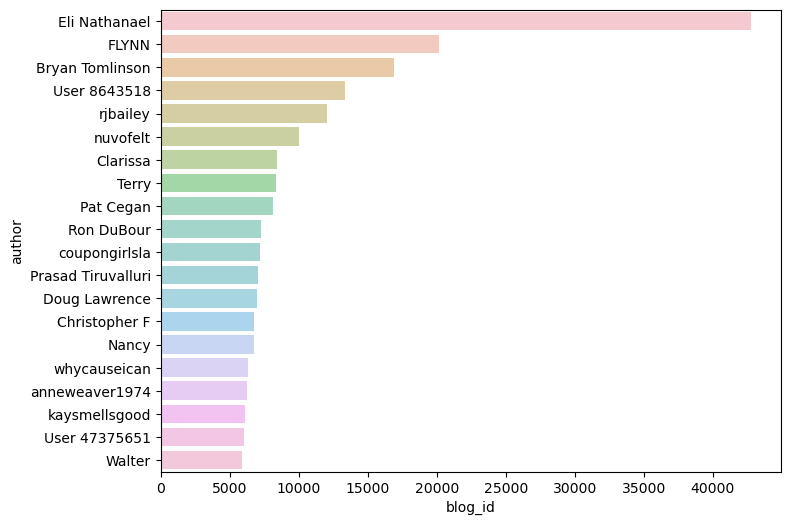

In [43]:
#%%
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(8,6))
sns.barplot(data = blogdf, x='blog_id', y='author', alpha=0.5)

### Findings:

1. Author named as 'Eli nathnael' has written a highest numbers of blogs
2. Author named as 'walter' has written a lowest numbers of blogs in the top 20 writers as per the count of written blogs

# Key metrics by language analysis

In [44]:
#%%
langdf =  df.groupby(['lang']).agg({'author_id':'count','blog_id':'count','post_id':'count','comment_count':'sum','like_count':'sum'}).reset_index()
# Creating metrics to better understand engagement
langdf["avg_likes_per_post"] = (langdf["like_count"] / langdf["post_id"]) * 100
langdf["Avg_comments_per_post"] = (langdf["comment_count"] / langdf["post_id"]) * 100
langdf["Avg_comments_per_author"] = (langdf["comment_count"] / langdf["author_id"]) * 100
langdf["pct_total_authors"] = (langdf["author_id"]/langdf["author_id"].sum()) * 100
langdf.sort_values(by = ["comment_count"],ascending=False).head(15)


,lang,author_id,blog_id,post_id,comment_count,like_count,avg_likes_per_post,Avg_comments_per_post,Avg_comments_per_author,pct_total_authors
11,en,1663327,1663327,1663327,5688460.000,7508080.000,451.389,341.993,341.993,91.937
55,tl,10460,10460,10460,154562.000,557.000,5.325,1477.648,1477.648,0.578
25,id,14404,14404,14404,134958.000,25357.000,176.041,936.948,936.948,0.796
18,fr,4620,4620,4620,65776.000,9851.000,213.225,1423.723,1423.723,0.255
13,es,20057,20057,20057,38227.000,17049.000,85.003,190.592,190.592,1.109
9,de,10380,10380,10380,23652.000,18418.000,177.437,227.861,227.861,0.574
37,nl,7431,7431,7431,19081.000,14629.000,196.864,256.776,256.776,0.411
40,pl,2963,2963,2963,15427.000,1867.000,63.010,520.655,520.655,0.164
20,gu,3733,3733,3733,14490.000,12314.000,329.869,388.160,388.160,0.206
42,pt-br,12833,12833,12833,14425.000,3373.000,26.284,112.406,112.406,0.709


**Findings**

Found out that **92% of authors have written blogs/posts in the "English" language** and received the highest number of comments and likes
    

Text(0.5, 0, 'Language')

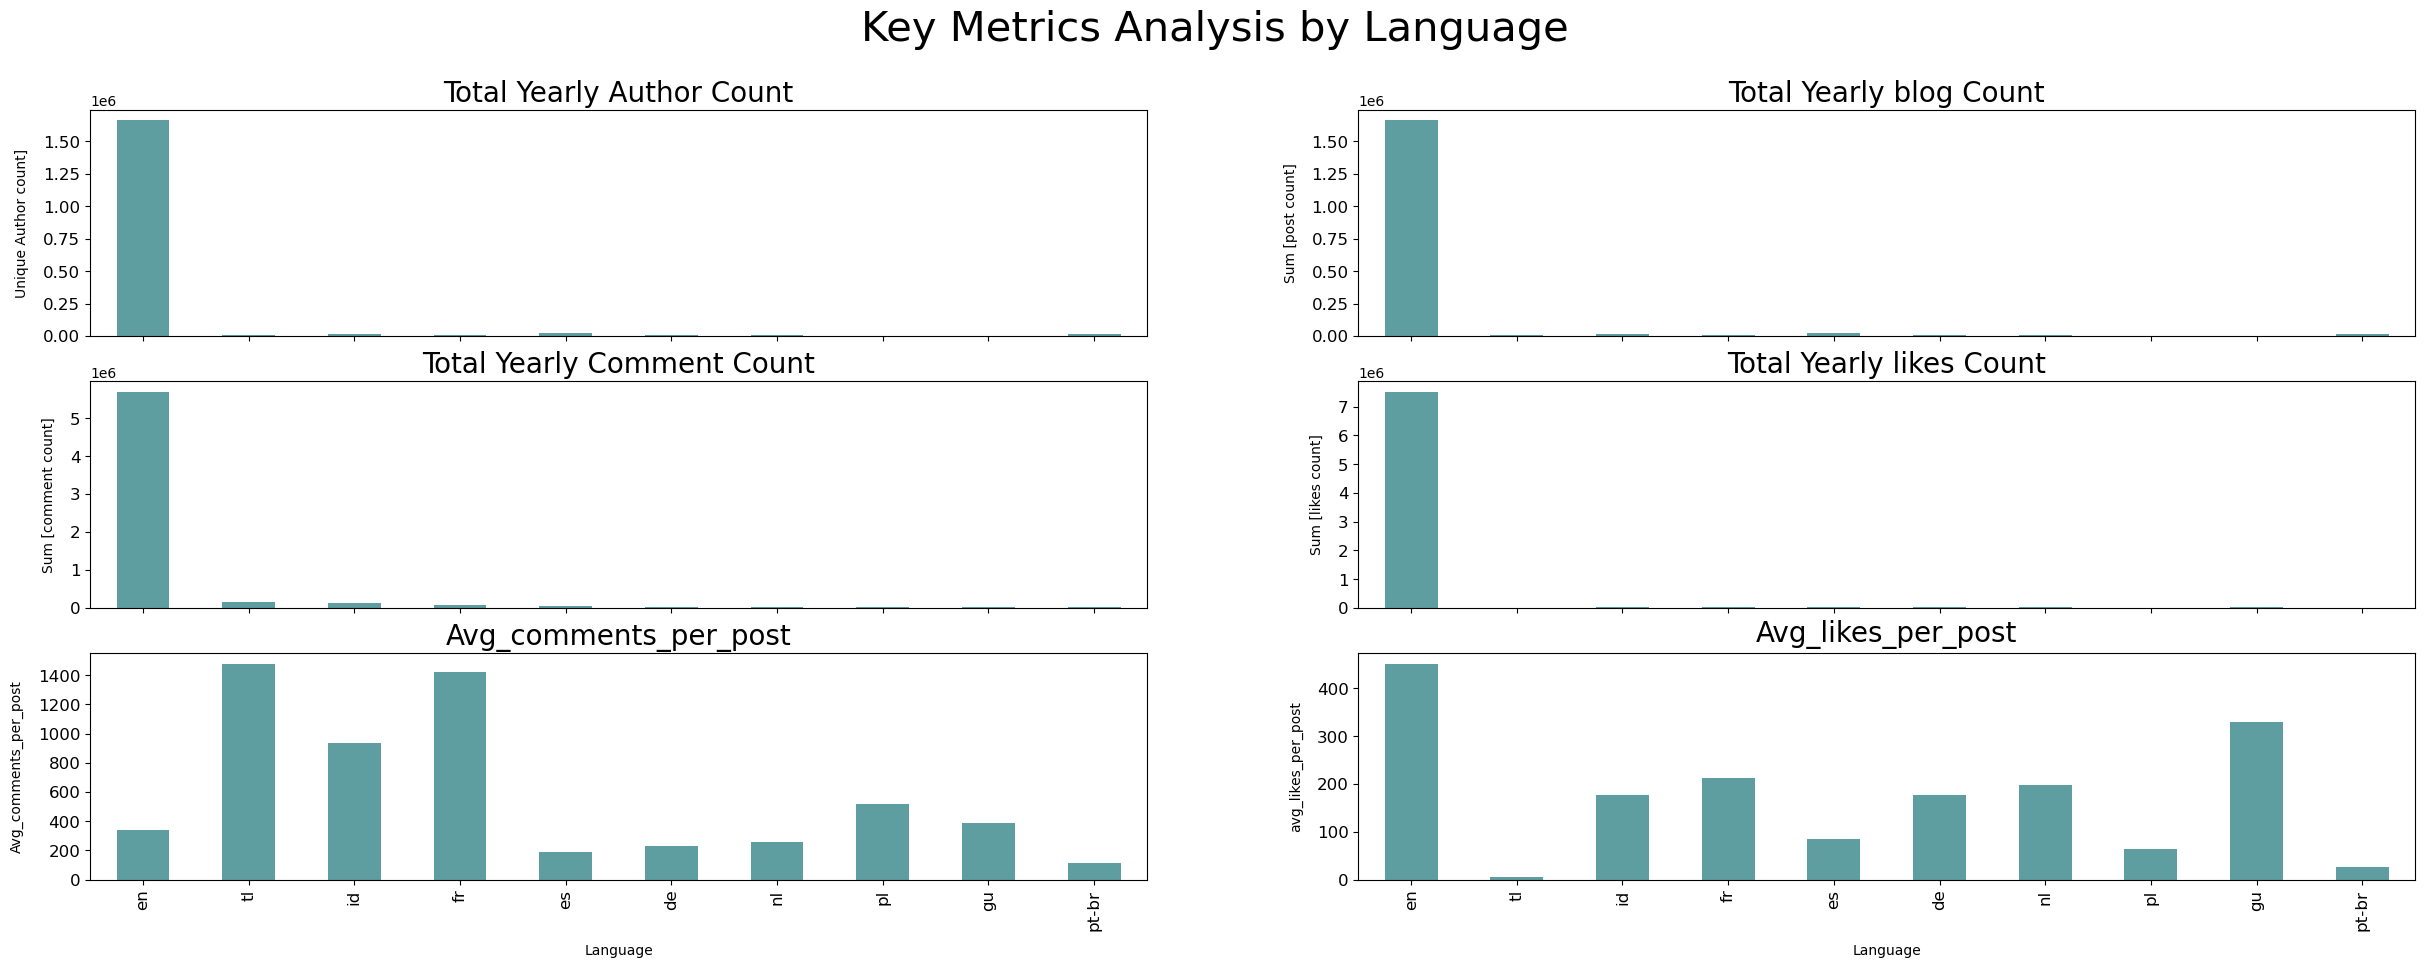

In [45]:
#%%
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(15,50))
fig.suptitle(f"Key Metrics Analysis by Language",fontsize=30)
# langdf = insdf[insdf['lang'] > '2005-01'].copy()
langdf = langdf.sort_values(by = ["comment_count"],ascending=False).head(10).copy()
# Author count
langdf.set_index('lang')['author_id'].plot(ax=axes[0, 0],kind='bar',figsize=(30, 10),color='cadetblue',rot=90, fontsize=12)
axes[0,0].set_title(f"Total Yearly Author Count",fontsize=20)
plt.title("", y=1.013, fontsize=20)
axes[0,0].set_ylabel("Unique Author count]", labelpad=10)
axes[0,0].set_xlabel("Language", labelpad=10)

# post Count
langdf.set_index('lang')['post_id'].plot(ax=axes[0, 1],kind='bar',figsize=(30, 10),color='cadetblue',rot=90, fontsize=12)
axes[0,1].set_title(f"Total Yearly blog Count",fontsize=20)
plt.title("", y=1.013, fontsize=20)
axes[0,1].set_ylabel("Sum [post count]", labelpad=10)
axes[0,1].set_xlabel("Language", labelpad=10)

# Total Yearly Comment Count
langdf.set_index('lang')['comment_count'].plot(ax=axes[1, 0],kind='bar',figsize=(30, 10),color='cadetblue',rot=90, fontsize=12)
axes[1,0].set_title(f"Total Yearly Comment Count",fontsize=20)
plt.title("", y=1.013, fontsize=20)
axes[1,0].set_ylabel("Sum [comment count]", labelpad=10)
axes[1,0].set_xlabel("Language", labelpad=10)

# Total Yearly like Count
langdf.set_index('lang')['like_count'].plot(ax=axes[1, 1],kind='bar',figsize=(30, 10),color='cadetblue',rot=90, fontsize=12)
axes[1,1].set_title(f"Total Yearly likes Count",fontsize=20)
plt.title("", y=1.013, fontsize=20)
axes[1,1].set_ylabel("Sum [likes count]", labelpad=10)
axes[1,1].set_xlabel("Language", labelpad=10)

# Avg_comments_per_post
langdf.set_index('lang')['Avg_comments_per_post'].plot(ax=axes[2, 0],kind='bar',figsize=(30, 10),color='cadetblue',rot=90, fontsize=12)
axes[2,0].set_title(f"Avg_comments_per_post",fontsize=20)
plt.title("", y=1.013, fontsize=20)
axes[2,0].set_ylabel("Avg_comments_per_post", labelpad=10)
axes[2,0].set_xlabel("Language", labelpad=10)

# avg_likes_per_post
langdf.set_index('lang')['avg_likes_per_post'].plot(ax=axes[2, 1],kind='bar',figsize=(30, 10),color='cadetblue',rot=90, fontsize=12)
axes[2,1].set_title(f"Avg_likes_per_post",fontsize=20)
plt.title("Avg_likes_per_post", y=1.013, fontsize=20)
axes[2,1].set_ylabel("avg_likes_per_post", labelpad=10)
axes[2,1].set_xlabel("Language", labelpad=10)



### Findings:

1. Total yearly author count: Total yearly author count is highest in the language 'English'
2. Total yearly blog count: Total yearly blog count is highest in the language 'English'
3. Total yearly comment count: Total yearly comment count is highest in the language 'English'
4. Total yearly likes count: Total yearly author count is highest in the language 'English'
5. Average comment per post: Average comment per post is surprisingly low in language 'English' 
    and high in language 'tl' and language 'fr'
6. Average likes per post: Average likes per post has been normally distributed for the language other than 'English'.
For language 'English', Average likes per post are highest



## Tool used for this analysis are as follows:
Json
Gzip - to unzip file from json to csv
import os import json import gzip

from urllib.request import urlopen

## Dataframe and Series

import pandas as pd import numpy as np from datetime import datetime, timedelta, date from datetime import *

import matplotlib.pyplot as plt import seaborn as sns import plotly.express as px import matplotlib

import warnings warnings.filterwarnings('ignore')

import warnings warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.style.use('fivethirtyeight') %matplotlib inline